# PaddleOCR

In [1]:
from paddleocr import PaddleOCR, draw_ocr

In [2]:
det_model_dir=r'C:\Users\HP\.paddleocr\whl\det\ch\ch_PP-OCRv4_det_infer'#文本位置检测模型
rec_model_dir=r'C:\Users\HP\.paddleocr\whl\rec\ch\ch_PP-OCRv4_rec_infer'#文本识别模型
cls_model_dir=r'C:\Users\HP\.paddleocr\whl\cls\ch_ppocr_mobile_v2.0_cls_infer'#文本方向分类模型

In [3]:
 # 初始化PaddleOCR，能够识别180度旋转的文字
ocr = PaddleOCR(use_angle_cls=True, lang='ch', 
                det_model_dir=det_model_dir, rec_model_dir=rec_model_dir, cls_model_dir=cls_model_dir)  # need to run only once to download and load model into memory

[2024/12/23 17:02:57] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\HP\\.paddleocr\\whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\HP\\.paddleocr\\whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e

In [4]:
import cv2
from matplotlib import pyplot as plt

## 彩色测试图像

In [12]:
 # 读取图片
image_path = './dataset/panels/color/18/0.jpg'
img = cv2.imread(image_path)

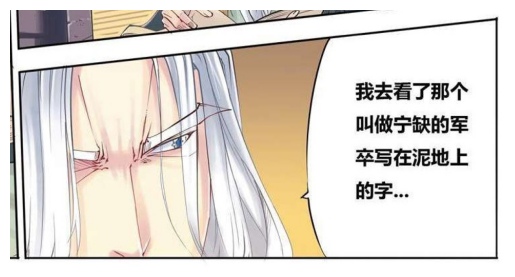

In [13]:
# 将图像编码从BGR转换为RGB，因为matplotlib期望RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# 使用matplotlib显示图像
plt.imshow(img_rgb)
plt.axis('off')  # 不显示坐标轴
plt.show()

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [15]:
img_gaussian = cv2.GaussianBlur(gray, (5, 5), 0)#先模糊，去除噪声

In [16]:
cv2.imshow('Gaussian Image', img_gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
result = ocr.ocr(image_path, cls=True)

for line in result[0]:
    text = line[1][0]
    confidence = line[1][1]
    print(f'Text: {text}, Confidence: {confidence}')

[2024/12/23 17:05:51] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.40091872215270996
[2024/12/23 17:05:51] ppocr DEBUG: cls num  : 4, elapsed : 0.011968135833740234
[2024/12/23 17:05:51] ppocr DEBUG: rec_res num  : 4, elapsed : 0.04587745666503906
Text: 我去看了那个, Confidence: 0.9983050227165222
Text: 叫做宁缺的军, Confidence: 0.9987323880195618
Text: 卒写在泥地上, Confidence: 0.9914141297340393
Text: 的字..., Confidence: 0.7416608929634094


In [18]:
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

[[[534.0, 111.0], [708.0, 111.0], [708.0, 143.0], [534.0, 143.0]], ('我去看了那个', 0.9983050227165222)]
[[[536.0, 164.0], [709.0, 164.0], [709.0, 193.0], [536.0, 193.0]], ('叫做宁缺的军', 0.9987323880195618)]
[[[535.0, 215.0], [708.0, 215.0], [708.0, 244.0], [535.0, 244.0]], ('卒写在泥地上', 0.9914141297340393)]
[[[531.0, 260.0], [621.0, 263.0], [620.0, 300.0], [530.0, 297.0]], ('的字...', 0.7416608929634094)]


`result`结果是一个list，每一个item包括了文本框的坐标，文字以及文字识别的置信度。

In [19]:
# draw result
from PIL import Image
result = result[0]
image = Image.open(image_path).convert("RGB")
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores)
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

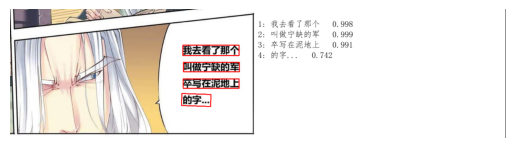

In [20]:
# 使用matplotlib显示图像
plt.imshow(im_show)
plt.axis('off')  # 不显示坐标轴
plt.show()

对于较为规范的对话框识别效果较好，但其可能是像素横向遍历识别，导致并非同一对话框内的文字识别在了一起，因此需要对对话框进行分割。

## 竖向文本测试图像

In [5]:
# 读取图片
image_path = './dataset/panels/gray/5.jpg'
img = cv2.imread(image_path)

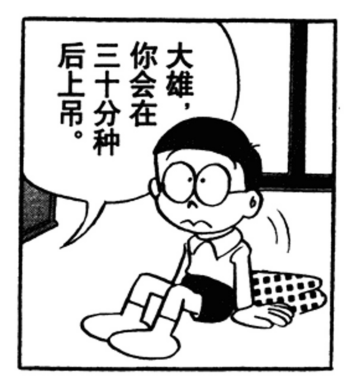

In [6]:
# 将图像编码从BGR转换为RGB，因为matplotlib期望RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# 使用matplotlib显示图像
plt.imshow(img_rgb)
plt.axis('off')  # 不显示坐标轴
plt.show()

In [7]:
result = ocr.ocr(image_path, cls=True)

for line in result[0]:
    text = line[1][0]
    confidence = line[1][1]
    print(f'Text: {text}, Confidence: {confidence}')

[2024/12/23 17:03:25] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.9819538593292236
[2024/12/23 17:03:25] ppocr DEBUG: cls num  : 8, elapsed : 0.19148802757263184
[2024/12/23 17:03:25] ppocr DEBUG: rec_res num  : 8, elapsed : 0.3988025188446045
Text: 你, Confidence: 0.999053418636322
Text: 大雄, Confidence: 0.8754199743270874
Text: 后, Confidence: 0.9915478825569153
Text: 三, Confidence: 0.9740575551986694
Text: 会在, Confidence: 0.9995589256286621
Text: 上吊, Confidence: 0.9909346103668213
Text: 十分种, Confidence: 0.9998116493225098


In [8]:
# 逆时针旋转90度
rotated_cw = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2.imshow('Rotated Clockwise', rotated_cw)
cv2.waitKey(0)
cv2.destroyAllWindows()
 
# 保存旋转后的图像
cv2.imwrite('rotated_cw.jpg', rotated_cw)

True

In [9]:
# 读取图片
image_path = 'rotated_cw.jpg'
img = cv2.imread(image_path)

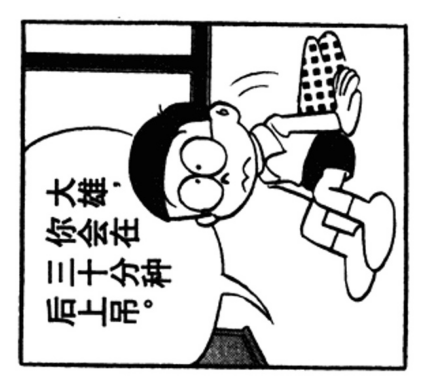

In [10]:
# 将图像编码从BGR转换为RGB，因为matplotlib期望RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# 使用matplotlib显示图像
plt.imshow(img_rgb)
plt.axis('off')  # 不显示坐标轴
plt.show()

In [11]:
result = ocr.ocr(image_path, cls=True)

for line in result[0]:
    text = line[1][0]
    confidence = line[1][1]
    print(f'Text: {text}, Confidence: {confidence}')

[2024/12/23 17:04:04] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.4974241256713867
[2024/12/23 17:04:04] ppocr DEBUG: cls num  : 4, elapsed : 0.06795525550842285
[2024/12/23 17:04:04] ppocr DEBUG: rec_res num  : 4, elapsed : 0.13434886932373047
Text: 大雄’, Confidence: 0.9397726058959961
Text: 你会在, Confidence: 0.9997254014015198
Text: 三十分种, Confidence: 0.9998093843460083
Text: 后上吊, Confidence: 0.9990193247795105
